<a href="https://colab.research.google.com/github/araldi/FS22---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L/blob/main/Week6/LinearModels_part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression
Instead of predicting within a quantitative range, logistic regression places the output into categories (binary classification prediction).

In a logistic regression model:

* we take linear combination (or weighted sum of the input features)
* we apply the sigmoid function to the result to obtain a number between 0 and 1
* this number represents the probability of the input being classified as "Yes"
* the cross entropy loss function is used to evaluate the results








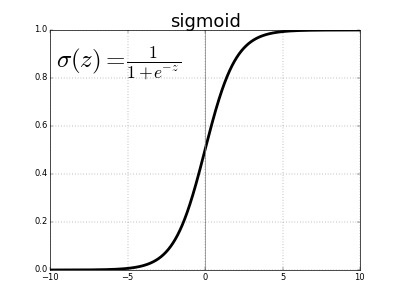

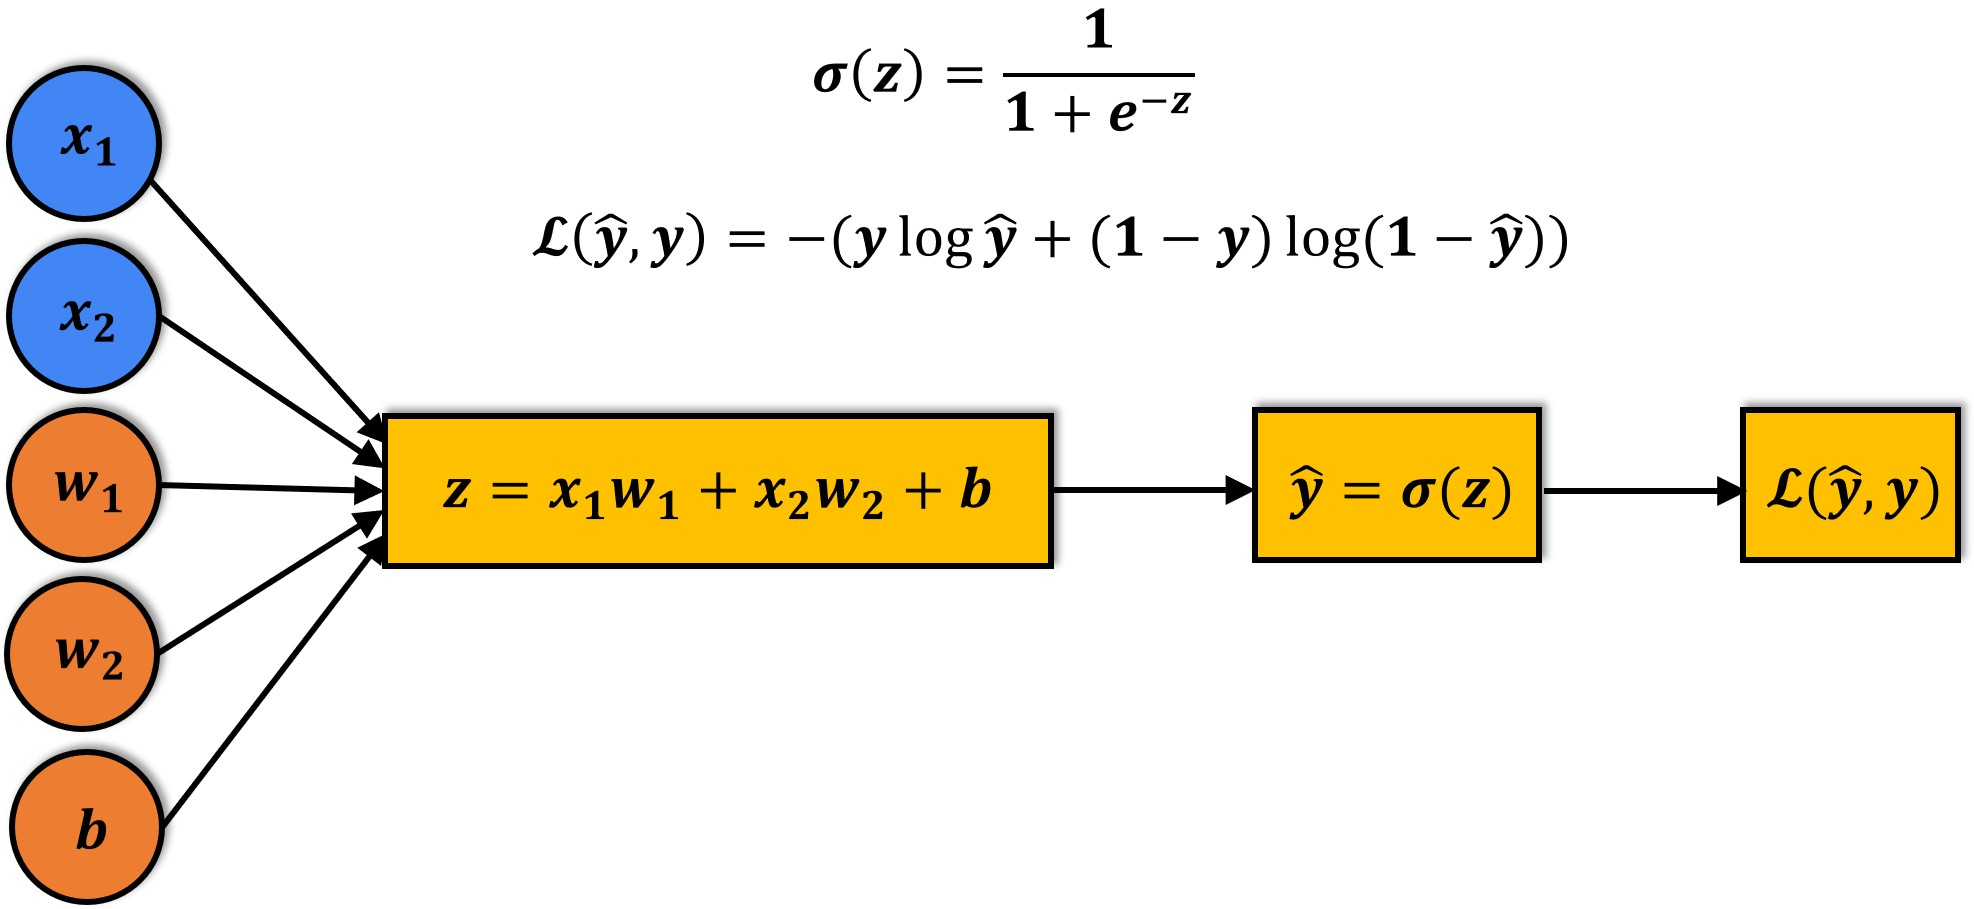

Let's predict if a breast cancer is benign or malignant based on radius, texture, perimeter, etc.

We will create a logistic regression model that models a training dataset, then use it to predict malignancy in a test dataset.

**Attribute Information:**

1) ID number

2) Diagnosis (M = malignant, B = benign)
3-32)

**Ten real-valued features are computed for each cell nucleus:**
a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset_url = 'https://raw.githubusercontent.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/main/Week6/Logistic_regression_data.csv'

breast = pd.read_csv(dataset_url)

### Exploratory analysis

In [ ]:
breast.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
feature_columns = breast.select_dtypes(exclude = ['int64','object']).columns
features = [i for i in feature_columns if 'Unnamed: 32' not in i]
features = [i.replace(' ', '_') for i in features]

len(features)

30

In [ ]:
features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave_points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [ ]:
breast.rename(columns = dict(zip(feature_columns, features)), inplace=True)

In [ ]:
breast

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


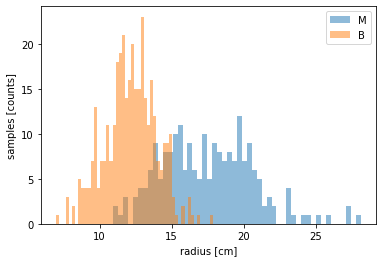

In [ ]:
m = breast['diagnosis'] == 'M'
b = breast['diagnosis'] == 'B'
plt.hist(x='radius_mean', data = breast[m], label = 'M', bins = 50, alpha = 0.5)
plt.hist(x='radius_mean', data = breast[b], label = 'B', bins = 50, alpha = 0.5)
plt.xlabel('radius [cm]')
plt.ylabel('samples [counts]')

plt.legend()


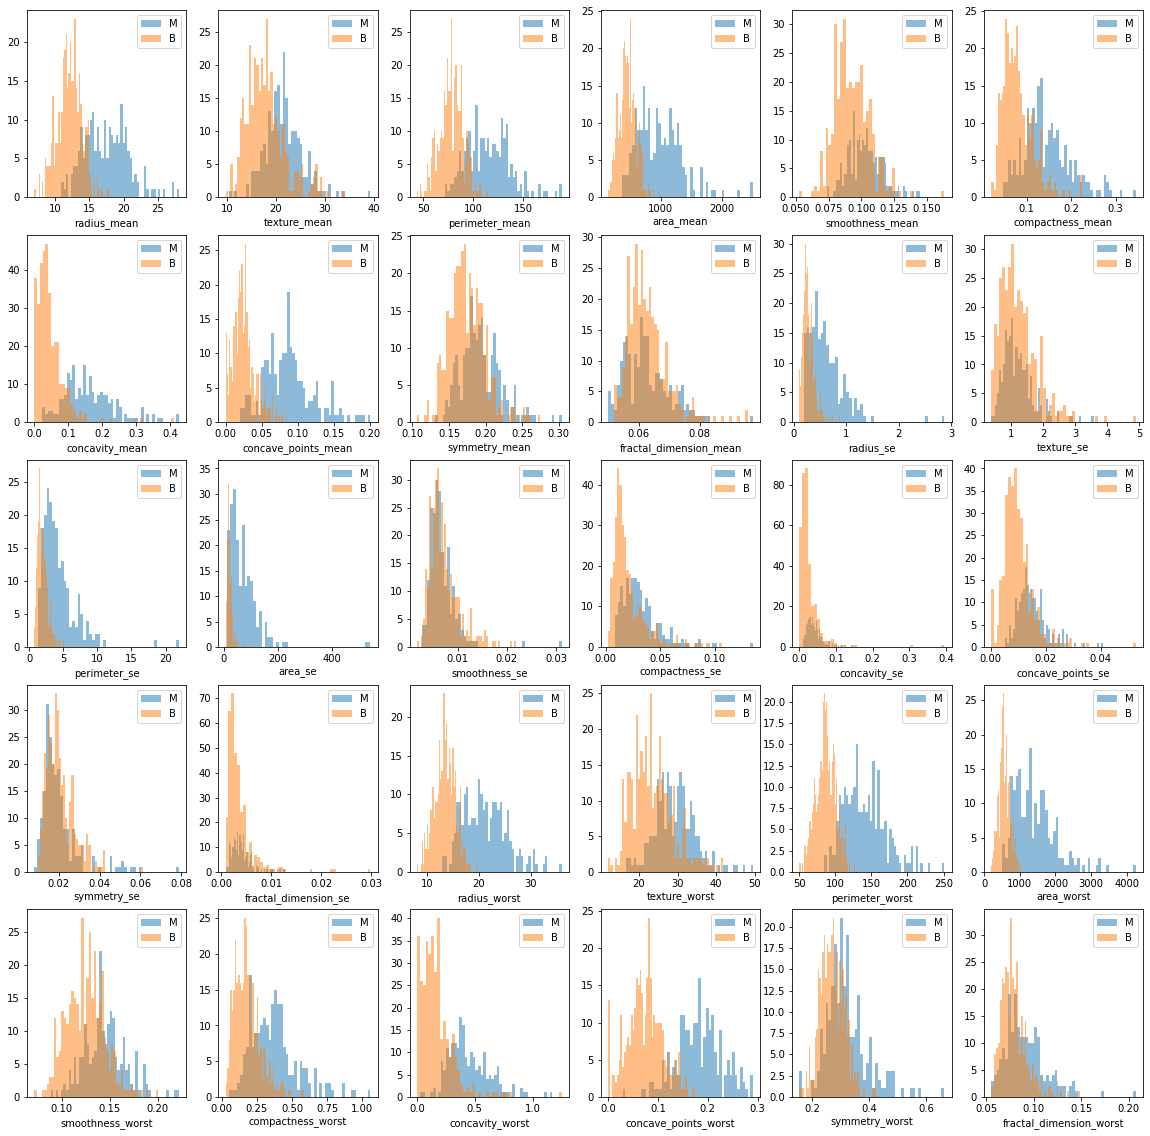

In [ ]:
plt.figure(figsize = (20,20))
i=1
m = breast['diagnosis'] == 'M'
b = breast['diagnosis'] == 'B'
for feature in features:

  plt.subplot(5,6, i)
  plt.hist(x=feature, data = breast[m], label = 'M', bins = 50, alpha = 0.5)
  plt.hist(x=feature, data = breast[b], label = 'B', bins = 50, alpha = 0.5)
  i = i+1
  plt.xlabel(feature)
  plt.legend()
plt.show()
plt.close()

### Transform the diagnosis in 0 or 1

In [ ]:
mask = breast['diagnosis'] == 'M'

breast.loc[mask, 'output'] = 1
breast.loc[~mask, 'output'] = 0

In [ ]:
breast

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,output
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN,1.0
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN,1.0
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN,1.0
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN,1.0
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN,1.0
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN,1.0
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN,1.0
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN,1.0


### Divide the dataset in training dataset and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(breast, test_size=0.2, random_state=2022)


In [ ]:
train_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,output
544,922297,B,13.87,20.70,89.77,584.8,0.09578,0.10180,0.036880,0.02369,...,99.17,688.6,0.1264,0.2037,0.13770,0.06845,0.2249,0.08492,NaN,0.0
226,88147101,B,10.44,15.46,66.62,329.6,0.10530,0.07722,0.006643,0.01216,...,73.47,395.4,0.1341,0.1153,0.02639,0.04464,0.2615,0.08269,NaN,0.0
325,89511502,B,12.67,17.30,81.25,489.9,0.10280,0.07664,0.031930,0.02107,...,88.70,574.4,0.1384,0.1212,0.10200,0.05602,0.2688,0.06888,NaN,0.0
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.04105,...,82.28,474.2,0.1298,0.2517,0.36300,0.09653,0.2112,0.08732,NaN,0.0
141,869104,M,16.11,18.05,105.10,813.0,0.09721,0.11370,0.094470,0.05943,...,129.00,1233.0,0.1314,0.2236,0.28020,0.12160,0.2792,0.08158,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,852552,M,16.65,21.38,110.00,904.6,0.11210,0.14570,0.152500,0.09170,...,177.00,2215.0,0.1805,0.3578,0.46950,0.20950,0.3613,0.09564,NaN,1.0
18,849014,M,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.147900,0.09498,...,186.80,2398.0,0.1512,0.3150,0.53720,0.23880,0.2768,0.07615,NaN,1.0
240,88350402,B,13.64,15.60,87.38,575.3,0.09423,0.06630,0.047050,0.03731,...,94.11,683.4,0.1278,0.1291,0.15330,0.09222,0.2530,0.06510,NaN,0.0
173,871641,B,11.08,14.71,70.21,372.7,0.10060,0.05743,0.023630,0.02583,...,72.01,396.5,0.1216,0.0824,0.03938,0.04306,0.1902,0.07313,NaN,0.0


In [ ]:
test_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,output
453,911201,B,14.530,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,103.10,749.9,0.1347,0.14780,0.13730,0.10690,0.2606,0.07810,NaN,0.0
153,87106,B,11.150,13.08,70.87,381.9,0.09754,0.05113,0.01982,0.01786,...,76.25,440.8,0.1341,0.08971,0.07116,0.05506,0.2859,0.06772,NaN,0.0
385,90291,M,14.600,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.05271,...,102.20,758.2,0.1312,0.15810,0.26750,0.13590,0.2477,0.06836,NaN,1.0
67,859465,B,11.310,19.04,71.80,394.1,0.08139,0.04701,0.03709,0.02230,...,78.00,466.7,0.1290,0.09148,0.14440,0.06961,0.2400,0.06641,NaN,0.0
528,918192,B,13.940,13.17,90.31,594.2,0.12480,0.09755,0.10100,0.06615,...,94.52,653.3,0.1394,0.13640,0.15590,0.10150,0.2160,0.07253,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,882488,B,9.567,15.91,60.21,279.6,0.08464,0.04087,0.01652,0.01667,...,65.74,335.9,0.1504,0.09515,0.07161,0.07222,0.2757,0.08178,NaN,0.0
388,903011,B,11.270,15.50,73.38,392.0,0.08365,0.11140,0.10070,0.02757,...,79.73,450.0,0.1102,0.28090,0.30210,0.08272,0.2157,0.10430,NaN,0.0
384,902727,B,13.280,13.72,85.79,541.8,0.08363,0.08575,0.05077,0.02864,...,96.59,623.7,0.1166,0.26850,0.28660,0.09173,0.2736,0.07320,NaN,0.0
171,87163,M,13.430,19.63,85.84,565.4,0.09048,0.06288,0.05858,0.03438,...,116.60,993.6,0.1401,0.15460,0.26440,0.11600,0.2884,0.07371,NaN,1.0


### Scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:
input_cols = features
target_col = 'output'

In [ ]:
scaler.fit(train_df[features])
train_df[features] = scaler.transform(train_df[features])



In [ ]:
train_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,output
544,922297,B,-0.055955,0.334807,-0.074122,-0.183103,-0.042860,-0.042485,-0.646152,-0.643657,...,-0.227195,-0.325798,-0.262873,-0.319339,-0.642079,-0.701544,-1.034791,0.058717,NaN,0.0
226,88147101,B,-1.051178,-0.913059,-1.046577,-0.927708,0.638402,-0.508435,-1.027508,-0.945635,...,-1.015921,-0.864491,0.070490,-0.876590,-1.167024,-1.067218,-0.455101,-0.064280,NaN,0.0
325,89511502,B,-0.404138,-0.474877,-0.432019,-0.459996,0.459500,-0.519429,-0.708582,-0.712276,...,-0.548516,-0.535617,0.256654,-0.839398,-0.810443,-0.892444,-0.339480,-0.825978,NaN,0.0
559,925291,B,-0.740715,1.104007,-0.714724,-0.712087,-0.269708,-0.036798,0.291190,-0.188988,...,-0.745544,-0.719713,-0.115674,-0.016759,0.420449,-0.270292,-1.251779,0.191090,NaN,0.0
141,869104,M,0.593987,-0.296270,0.569841,0.482723,0.059473,0.183097,0.080187,0.292395,...,0.688279,0.674421,-0.046404,-0.193894,0.029959,0.114733,-0.174760,-0.125503,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,852552,M,0.750669,0.496744,0.775673,0.749986,1.125018,0.789705,0.812076,1.137566,...,2.161386,2.478638,2.079331,0.652069,0.922709,1.464699,1.125582,0.649985,NaN,1.0
18,849014,M,1.667551,0.680114,1.615807,1.786947,0.138190,-0.025424,0.754059,1.223471,...,2.462145,2.814862,0.810817,0.382268,1.241986,1.914688,-0.212772,-0.424997,NaN,1.0
240,88350402,B,-0.122690,-0.879719,-0.174518,-0.210822,-0.153779,-0.715439,-0.517885,-0.286941,...,-0.382485,-0.335352,-0.202262,-0.789598,-0.568509,-0.336485,-0.589729,-1.034466,NaN,0.0
173,871641,B,-0.865480,-1.091666,-0.895773,-0.801953,0.302065,-0.883583,-0.813264,-0.587609,...,-1.060728,-0.862470,-0.470684,-1.083983,-1.105762,-1.091483,-1.584387,-0.591567,NaN,0.0


In [ ]:
scaler.fit(test_df[features])
test_df[features] = scaler.transform(test_df[features])

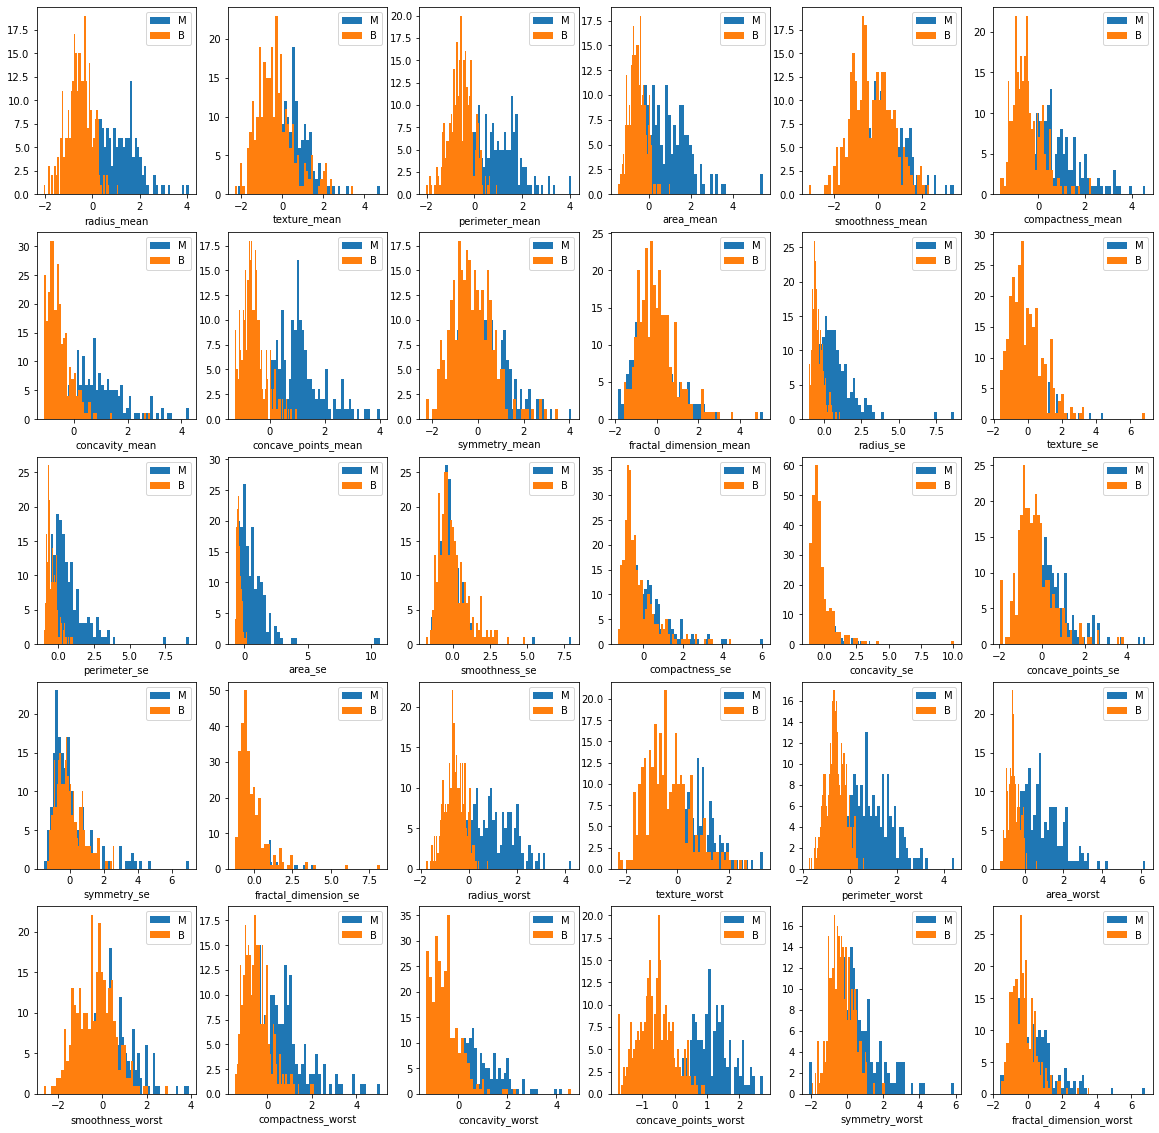

In [ ]:
# check that the scaling worked
plt.figure(figsize = (20,20))
i=1
for feature in features:
  m = train_df['output'] == 1
  b = train_df['output'] == 0
  plt.subplot(5,6, i)
  plt.hist(x=feature, data = train_df[m], label = 'M', bins = 50)
  plt.hist(x=feature, data = train_df[b], label = 'B', bins = 50)
  i = i+1
  plt.xlabel(feature)
  plt.legend()
plt.show()
plt.close()

### Training a logistic regression model

In [ ]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

model = smf.logit("output ~ radius_mean + texture_mean", data = train_df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.257013
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 output   No. Observations:                  455
Model:                          Logit   Df Residuals:                      452
Method:                           MLE   Df Model:                            2
Date:                Fri, 01 Apr 2022   Pseudo R-squ.:                  0.6083
Time:                        07:32:12   Log-Likelihood:                -116.94
converged:                       True   LL-Null:                       -298.55
Covariance Type:            nonrobust   LLR p-value:                 1.346e-79
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7826      0.170     -4.614      0.000      -1.115      -0.450
radius_mean      3.6056      0.390      9.254      0.000       2.842       4.369
texture_mean     1.0134      0.183      5.534      0.000       0.654       1.372
================================================================================
"""

In [ ]:
formula_features = ''
for i in features[:10]:
  i = i.replace(' ', '_')
  formula_features = i + " + " + formula_features
formula_features = formula_features[:-3]

In [ ]:
formula_features

'fractal_dimension_mean + symmetry_mean + concave_points_mean + concavity_mean + compactness_mean + smoothness_mean + area_mean + perimeter_mean + texture_mean + radius_mean + '

In [ ]:
model = smf.logit("output ~ %s" %formula_features, data = train_df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.129225
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 output   No. Observations:                  455
Model:                          Logit   Df Residuals:                      444
Method:                           MLE   Df Model:                           10
Date:                Fri, 01 Apr 2022   Pseudo R-squ.:                  0.8031
Time:                        07:34:33   Log-Likelihood:                -58.797
converged:                       True   LL-Null:                       -298.55
Covariance Type:            nonrobust   LLR p-value:                 1.056e-96
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.2107      0.581      0.363      0.717      -0.928       1.349
fractal_dimension_mean     0.4358      0.688      0.634      0.526      -0.912       1.784
symmetry_mean              0.5435      0.343      1.583      0.113      -0.129       1.216
concave_points_mean        2.1156      1.175      1.801      0.072      -0.186       4.418
concavity_mean             1.5577      0.745      2.090      0.037       0.097       3.019
compactness_mean          -1.1979      1.190     -1.007      0.314      -3.530       1.134
smoothness_mean            1.1387      0.533      2.135      0.033       0.094       2.184
area_mean                 11.2001      6.286      1.782      0.075      -1.120      23.521
perimeter_mean            -8.2001     12.813     -0.640      0.522     -33.313      16.913
texture_mean               1.6283      0.310      5.256      0.000       1.021       2.235
radius_mean                2.2393     13.871      0.161      0.872     -24.947      29.426
==========================================================================================

Possibly complete quasi-separation: A fraction 0.18 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
formula_features = ''
for i in features[:20]:
  i = i.replace(' ', '_')
  formula_features = i + " + " + formula_features
formula_features = formula_features[:-3]

model = smf.logit("output ~ %s" %formula_features, data = train_df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.087999
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 output   No. Observations:                  455
Model:                          Logit   Df Residuals:                      434
Method:                           MLE   Df Model:                           20
Date:                Fri, 01 Apr 2022   Pseudo R-squ.:                  0.8659
Time:                        07:36:38   Log-Likelihood:                -40.040
converged:                       True   LL-Null:                       -298.55
Covariance Type:            nonrobust   LLR p-value:                 7.927e-97
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  1.8869      1.167      1.616      0.106      -0.401       4.175
fractal_dimension_se      -1.7326      1.079     -1.606      0.108      -3.847       0.381
symmetry_se               -0.7848      0.645     -1.218      0.223      -2.048       0.479
concave_points_se         -0.1305      0.986     -0.132      0.895      -2.063       1.802
concavity_se              -2.1614      1.615     -1.338      0.181      -5.326       1.004
compactness_se             1.3659      1.284      1.063      0.288      -1.151       3.883
smoothness_se             -0.0426      0.537     -0.079      0.937      -1.096       1.011
area_se                   12.7057      8.415      1.510      0.131      -3.787      29.198
perimeter_se              -1.4390      3.427     -0.420      0.675      -8.156       5.278
texture_se                -0.7930      0.534     -1.486      0.137      -1.839       0.253
radius_se                 -3.7650      5.588     -0.674      0.500     -14.717       7.187
fractal_dimension_mean     1.7901      1.178      1.520      0.129      -0.518       4.099
symmetry_mean              1.3002      0.613      2.121      0.034       0.099       2.502
concave_points_mean        1.8457      2.184      0.845      0.398      -2.434       6.126
concavity_mean             7.4746      2.931      2.551      0.011       1.731      13.219
compactness_mean          -3.2667      2.541     -1.285      0.199      -8.248       1.714
smoothness_mean            0.4183      0.781      0.535      0.592      -1.113       1.949
area_mean                  9.0164      8.424      1.070      0.284      -7.493      25.526
perimeter_mean           -18.7672     22.852     -0.821      0.412     -63.557      26.023
texture_mean               2.0149      0.453      4.451      0.000       1.128       2.902
radius_mean               12.1271     23.654      0.513      0.608     -34.233      58.487
==========================================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
formula_features = ''
for i in features:
  i = i.replace(' ', '_')
  formula_features = i + " + " + formula_features
formula_features = formula_features[:-3]
formula_features

'fractal_dimension_worst + symmetry_worst + concave_points_worst + concavity_worst + compactness_worst + smoothness_worst + area_worst + perimeter_worst + texture_worst + radius_worst + fractal_dimension_se + symmetry_se + concave_points_se + concavity_se + compactness_se + smoothness_se + area_se + perimeter_se + texture_se + radius_se + fractal_dimension_mean + symmetry_mean + concave_points_mean + concavity_mean + compactness_mean + smoothness_mean + area_mean + perimeter_mean + texture_mean + radius_mean'

In [ ]:
# removed some features that caused a singular matrix
model = smf.logit("output ~ fractal_dimension_worst +   \
 fractal_dimension_se + symmetry_se + concave_points_se + \
concavity_se + compactness_se + smoothness_se + area_se + perimeter_se + texture_se + \
radius_se + fractal_dimension_mean + symmetry_mean + concave_points_mean + concavity_mean + \
compactness_mean + smoothness_mean + area_mean + perimeter_mean + texture_mean + radius_mean", data = train_df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.052109
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 output   No. Observations:                  455
Model:                          Logit   Df Residuals:                      433
Method:                           MLE   Df Model:                           21
Date:                Fri, 01 Apr 2022   Pseudo R-squ.:                  0.9206
Time:                        07:37:30   Log-Likelihood:                -23.709
converged:                       True   LL-Null:                       -298.55
Covariance Type:            nonrobust   LLR p-value:                5.905e-103
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.5653      1.702      1.507      0.132      -0.771       5.901
fractal_dimension_worst     8.1243      2.148      3.783      0.000       3.915      12.334
fractal_dimension_se       -6.9825      2.484     -2.811      0.005     -11.851      -2.114
symmetry_se                -1.7364      1.064     -1.633      0.103      -3.821       0.348
concave_points_se           2.8893      1.992      1.451      0.147      -1.014       6.793
concavity_se               -1.4262      2.166     -0.658      0.510      -5.672       2.820
compactness_se              1.6747      1.897      0.883      0.377      -2.044       5.394
smoothness_se               0.4075      0.886      0.460      0.646      -1.329       2.145
area_se                    22.8544     12.582      1.816      0.069      -1.805      47.514
perimeter_se               -6.1430      4.657     -1.319      0.187     -15.271       2.985
texture_se                  0.2059      0.887      0.232      0.816      -1.533       1.944
radius_se                  -0.8762      7.289     -0.120      0.904     -15.162      13.410
fractal_dimension_mean     -0.3841      1.982     -0.194      0.846      -4.268       3.500
symmetry_mean               1.6851      0.885      1.904      0.057      -0.049       3.420
concave_points_mean        -0.6132      3.597     -0.170      0.865      -7.664       6.438
concavity_mean              5.8731      5.025      1.169      0.242      -3.976      15.722
compactness_mean           -6.6980      3.898     -1.718      0.086     -14.339       0.943
smoothness_mean             1.2247      1.143      1.072      0.284      -1.015       3.465
area_mean                   8.9597     12.996      0.689      0.491     -16.512      34.432
perimeter_mean              2.3295     42.932      0.054      0.957     -81.816      86.475
texture_mean                2.3551      0.904      2.604      0.009       0.583       4.127
radius_mean                -5.9580     40.822     -0.146      0.884     -85.968      74.052
===========================================================================================

Possibly complete quasi-separation: A fraction 0.62 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
# removed some features that caused a singular matrix
model = smf.logit("output ~ fractal_dimension_worst +   \
 fractal_dimension_se + symmetry_se + concave_points_se + \
concavity_se + compactness_se + smoothness_se + area_se + perimeter_se + texture_se + \
radius_se + fractal_dimension_mean + symmetry_mean + concave_points_mean + concavity_mean + \
compactness_mean + smoothness_mean + texture_mean + radius_mean", data = train_df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.052638
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 output   No. Observations:                  455
Model:                          Logit   Df Residuals:                      435
Method:                           MLE   Df Model:                           19
Date:                Fri, 01 Apr 2022   Pseudo R-squ.:                  0.9198
Time:                        07:46:53   Log-Likelihood:                -23.950
converged:                       True   LL-Null:                       -298.55
Covariance Type:            nonrobust   LLR p-value:                2.568e-104
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.0045      1.406      1.425      0.154      -0.752       4.761
fractal_dimension_worst     7.9786      2.049      3.893      0.000       3.962      11.996
fractal_dimension_se       -6.7554      2.556     -2.643      0.008     -11.766      -1.745
symmetry_se                -1.5947      1.025     -1.556      0.120      -3.603       0.414
concave_points_se           2.6626      1.902      1.400      0.161      -1.064       6.390
concavity_se               -1.3082      1.850     -0.707      0.479      -4.934       2.318
compactness_se              1.4975      2.087      0.718      0.473      -2.593       5.588
smoothness_se               0.4693      0.865      0.542      0.588      -1.227       2.165
area_se                    22.9912     12.264      1.875      0.061      -1.047      47.029
perimeter_se               -5.6677      3.603     -1.573      0.116     -12.729       1.393
texture_se                  0.1314      0.719      0.183      0.855      -1.277       1.540
radius_se                  -1.2399      6.706     -0.185      0.853     -14.383      11.903
fractal_dimension_mean     -0.1951      1.983     -0.098      0.922      -4.082       3.692
symmetry_mean               1.5379      0.891      1.725      0.084      -0.209       3.285
concave_points_mean        -0.4928      3.431     -0.144      0.886      -7.217       6.231
concavity_mean              6.2989      4.018      1.568      0.117      -1.577      14.174
compactness_mean           -7.0886      3.415     -2.075      0.038     -13.783      -0.395
smoothness_mean             1.2347      1.242      0.994      0.320      -1.199       3.669
texture_mean                2.3143      0.826      2.803      0.005       0.696       3.933
radius_mean                 4.1525      2.780      1.494      0.135      -1.295       9.600
===========================================================================================

Possibly complete quasi-separation: A fraction 0.61 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
train_df[features].corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.313075,0.997685,0.986864,0.193081,0.507545,0.697067,0.823964,0.159234,-0.289079,...,0.967954,0.279889,0.962839,0.940984,0.131332,0.394856,0.528070,0.740542,0.150133,0.016301
texture_mean,0.313075,1.000000,0.321987,0.315469,0.022957,0.270683,0.337288,0.315523,0.123507,-0.018920,...,0.339840,0.903865,0.349005,0.331758,0.106470,0.288683,0.317885,0.305356,0.131711,0.149215
perimeter_mean,0.997685,0.321987,1.000000,0.985916,0.230240,0.559998,0.737405,0.852960,0.195480,-0.236193,...,0.967861,0.290122,0.968680,0.941470,0.163107,0.438485,0.565784,0.767514,0.176365,0.060753
area_mean,0.986864,0.315469,0.985916,1.000000,0.196673,0.497479,0.705348,0.823222,0.162703,-0.264887,...,0.959191,0.274057,0.955053,0.957925,0.132176,0.370044,0.512511,0.715707,0.125725,0.011260
smoothness_mean,0.193081,0.022957,0.230240,0.196673,1.000000,0.658882,0.534375,0.569606,0.570573,0.580177,...,0.235281,0.094573,0.263943,0.227488,0.814589,0.486155,0.449460,0.517818,0.403906,0.491981
compactness_mean,0.507545,0.270683,0.559998,0.497479,0.658882,1.000000,0.891036,0.831360,0.600266,0.584872,...,0.537594,0.295179,0.596490,0.509393,0.578875,0.865312,0.820009,0.810156,0.514950,0.682314
concavity_mean,0.697067,0.337288,0.737405,0.705348,0.534375,0.891036,1.000000,0.928763,0.496390,0.336101,...,0.710581,0.345542,0.754367,0.698662,0.470974,0.762188,0.882006,0.864728,0.418767,0.511481
concave_points_mean,0.823964,0.315523,0.852960,0.823222,0.569606,0.831360,0.928763,1.000000,0.470519,0.189334,...,0.834305,0.323124,0.861843,0.814225,0.471435,0.664288,0.753004,0.908250,0.375033,0.377617
symmetry_mean,0.159234,0.123507,0.195480,0.162703,0.570573,0.600266,0.496390,0.470519,1.000000,0.466080,...,0.198655,0.145828,0.237027,0.190936,0.445363,0.478295,0.431410,0.427354,0.704650,0.419160
fractal_dimension_mean,-0.289079,-0.018920,-0.236193,-0.264887,0.580177,0.584872,0.336101,0.189334,0.466080,1.000000,...,-0.230884,0.026894,-0.175991,-0.216575,0.528789,0.500358,0.361130,0.195101,0.362090,0.771283


### Making predictions and evaluating the model

Testing the predictions on the train dataset

In [ ]:
train_preds = model.predict(train_df[features])

In [ ]:
train_preds

544    4.894125e-04
226    9.445558e-07
325    6.600617e-06
559    5.913994e-04
141    9.999991e-01
           ...     
24     1.000000e+00
18     1.000000e+00
240    1.729915e-03
173    1.888015e-07
220    5.447292e-05
Length: 455, dtype: float64

In [ ]:
round(train_preds)

269    0.0
51     0.0
187    0.0
28     1.0
199    1.0
      ... 
44     1.0
128    0.0
57     1.0
341    0.0
116    0.0
Length: 455, dtype: float64

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(train_df['output'], round(train_preds))
print("Accuracy: {:.2f} %".format(100*accuracy))

Accuracy: 97.80 %


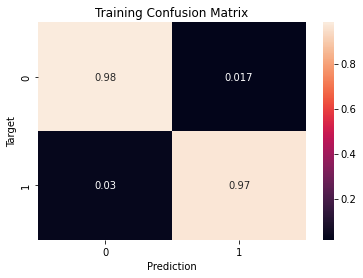

In [ ]:
from sklearn.metrics import confusion_matrix
cf =confusion_matrix(train_df['output'], round(train_preds), normalize='true')
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Training Confusion Matrix');

Testing the predictions on the test dataset

Accuracy: 94.74 %


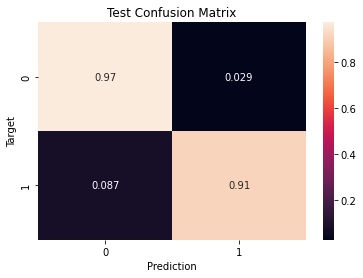

In [ ]:
test_preds = model.predict(test_df[features])
accuracy = accuracy_score(test_df['output'], round(test_preds))
print("Accuracy: {:.2f} %".format(100*accuracy))
cf =confusion_matrix(test_df['output'], round(test_preds), normalize='true')
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Test Confusion Matrix');
